In [9]:
#step 8
from scipy.stats import binom, binom_test, ttest_ind


In [14]:
N = 1000
F_H0 = binom(n=N, p=0.1)
2 * F_H0.cdf(87)

0.18385832421122036

In [17]:
binom_test(113, 1000, 0.1)

0.1705138422368937

In [19]:
binom.cdf(k=83, n=1000, p=0.1) + binom.cdf(k=113, n=1000, p=0.113)

0.5633572062775363

In [20]:
from scipy.stats import t
import numpy as np

mu0 = 18.1
N = 100
std = 8.2
mu = 16.5
t_n = (mu - mu0) / (std / np.sqrt(N))

2 * (1 - t(N-1).cdf(np.abs(t_n)))

0.05385741608695005

In [1]:
#step 11, 12
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1]

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
inc_houseage_more_30 = df[df.HouseAge > 30 ].MedInc
inc_houseage_less_30 = df[df.HouseAge < 30 ].MedInc

In [18]:
ttest_ind(inc_houseage_more_30, inc_houseage_less_30, equal_var=False )

Ttest_indResult(statistic=-13.422706222895025, pvalue=6.701697809951166e-41)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

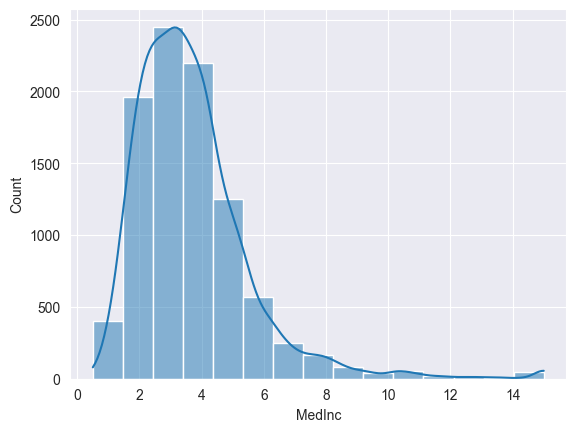

In [22]:
#step 14
sns.histplot(inc_houseage_more_30, bins=15, kde=True)
plt.show()

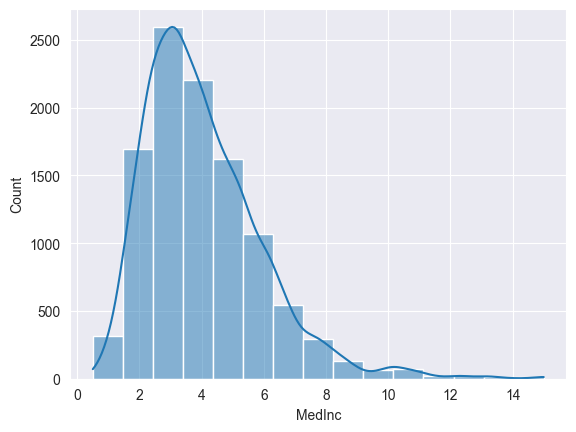

In [23]:
sns.histplot(inc_houseage_less_30, bins=15, kde=True)
plt.show()

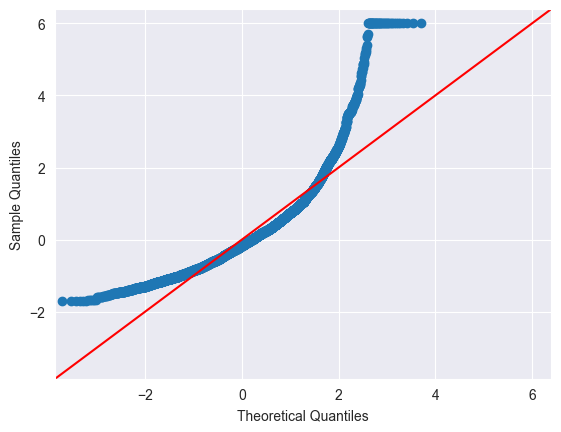

In [24]:
import statsmodels.api as sm

values = (inc_houseage_more_30 - inc_houseage_more_30.mean()) / inc_houseage_more_30.std()
sm.qqplot(values, line='45')
plt.show()

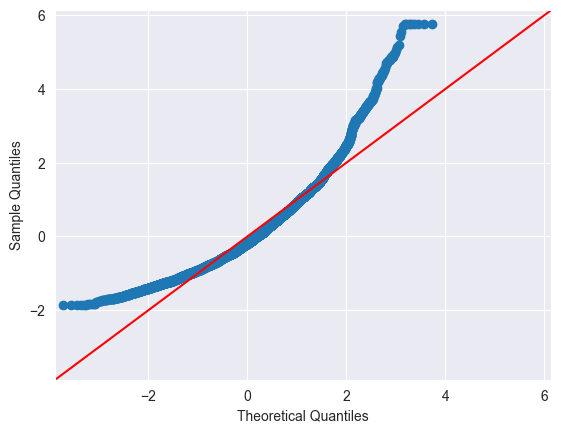

In [25]:
values = (inc_houseage_less_30 - inc_houseage_less_30.mean()) / inc_houseage_less_30.std()
sm.qqplot(values, line='45')
plt.show()

In [26]:
from scipy.stats import shapiro

shapiro(inc_houseage_more_30)

E:\ML\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8525028228759766, pvalue=0.0)

In [27]:
from scipy.stats import shapiro

shapiro(inc_houseage_less_30)

E:\ML\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9230856895446777, pvalue=0.0)

In [30]:
#step 15
from math import log
log_inc_houseage_less_30 = inc_houseage_less_30.apply(log)
log_inc_houseage_more_30 = inc_houseage_more_30.apply(log)

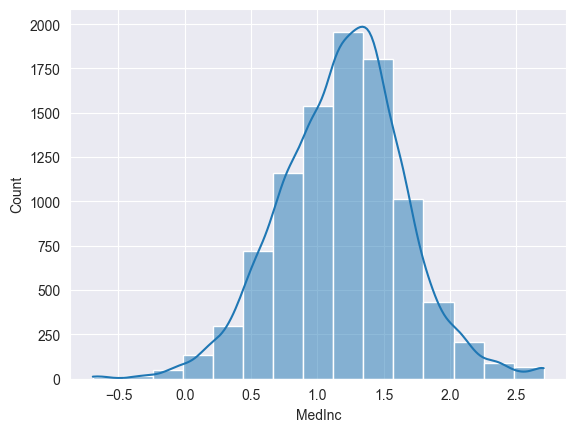

In [32]:
sns.histplot(log_inc_houseage_more_30, bins=15, kde=True)
plt.show()

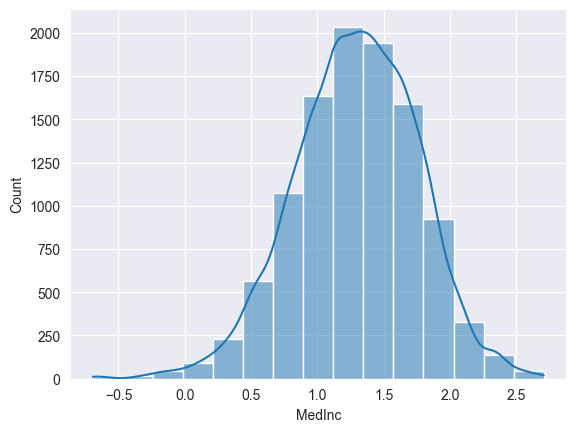

In [33]:
sns.histplot(log_inc_houseage_less_30, bins=15, kde=True)
plt.show()

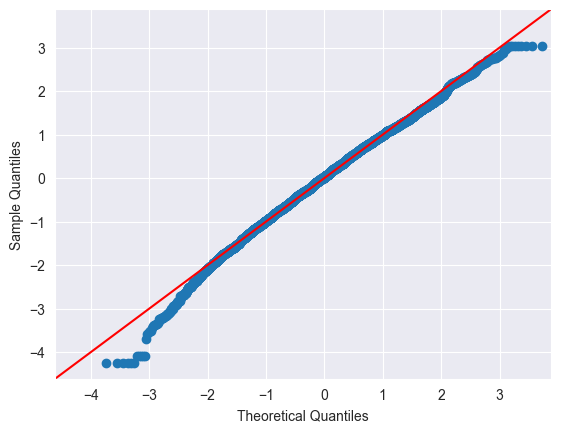

In [34]:
values = (log_inc_houseage_less_30 - log_inc_houseage_less_30.mean()) / log_inc_houseage_less_30.std()
sm.qqplot(values, line='45')
plt.show()

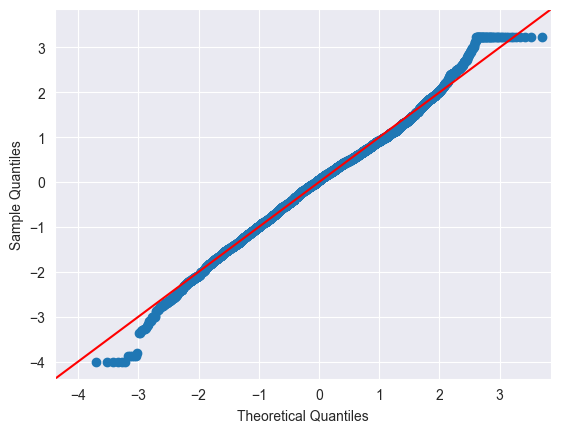

In [35]:
values = (log_inc_houseage_more_30 - log_inc_houseage_more_30.mean()) / log_inc_houseage_more_30.std()
sm.qqplot(values, line='45')
plt.show()

In [36]:
shapiro(log_inc_houseage_less_30)

E:\ML\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9959601163864136, pvalue=1.216053968033069e-16)

In [37]:
shapiro(log_inc_houseage_more_30)

E:\ML\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9950178265571594, pvalue=1.2855179158100876e-17)